In [21]:
### Packages and the main dataset

import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features.pca import PCADecomposition



import warnings
warnings.filterwarnings('ignore')



bladder_cancer_file = "/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/BladderC_data.txt"
df = pd.read_csv(bladder_cancer_file, delimiter="\t", header = None, low_memory=False) 

#display(df.head(40))
#display(df.tail(5))



In [22]:
### Data Wrangling 

#Dropping soon to be columns from the dataset
df2 = df.drop([0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], axis=0) 
df3 = df2.T
df3 = df3.drop([2601], axis=1)
display(df3.head(10))

#Labeling and headers
df3.loc[0, 10] = 'Gender'
df3.loc[0, 11] = 'Age'
df3.loc[0, 12] = 'Class'
df3.loc[0, 13] = 'Path_Stage'
df3.loc[0, 14] = 'Path_Grade'
df3.loc[0, 35] = 'Sample_ID'
#df3.head(10)

new_header = df3.iloc[0] 
df4 = df3[1:] 
df4.columns = new_header 
#df4.head()

df4['Gender']     = df4['Gender'].str.replace('Sex: ', '')
df4['Age']        = df4['Age'].str.replace('age: ', '')
df4['Class']      = df4['Class'].str.replace('disease status: ', '')
df4['Path_Stage'] = df4['Path_Stage'].str.replace('pathological tstage: ', '')
df4['Path_Grade'] = df4['Path_Grade'].str.replace('pathological grade: ', '')
display(df4.head(10))
display(df4.tail())



,10,11,12,13,14,35,36,37,38,39,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,ID_REF,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Sex: Male,age: 59,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Sex: Female,age: 77,disease status: Bladder Cancer,pathological tstage: >=pT2,pathological grade: high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Sex: Male,age: 50,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Sex: Male,age: 76,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Sex: Female,age: 81,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Sex: Male,age: 54,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Sex: Male,age: 74,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Sex: Female,age: 76,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Sex: Male,age: 58,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
968,Male,56,Sarcoma,uncertain,uncertain,GSM3107823,3.708,0.047,0.047,2.367,...,0.047,0.047,7.018,0.047,0.047,4.981,5.108,0.047,0.047,0.047
969,Male,30,Sarcoma,uncertain,uncertain,GSM3107824,0.132,5.036,2.702,3.014,...,0.132,4.692,7.139,3.550,0.132,6.421,5.440,2.879,0.132,1.333
970,Female,28,Sarcoma,uncertain,uncertain,GSM3107825,5.440,6.437,6.580,4.195,...,6.006,1.825,7.207,7.598,3.817,5.860,7.004,4.843,1.825,5.272
971,Male,60,Sarcoma,uncertain,uncertain,GSM3107826,0.071,4.577,5.210,3.543,...,0.071,0.071,7.237,0.071,0.071,4.031,0.071,6.098,0.071,0.071
972,Male,77,Sarcoma,uncertain,uncertain,GSM3107827,4.798,4.875,5.118,4.896,...,-1.124,3.719,8.208,4.938,-1.183,6.317,5.534,5.347,3.918,4.491


In [23]:
### Data Wrangling 

#Looking at unique values of the columns
df5=df4
display(df5["Gender"].unique())
display(df5["Age"].unique())
display(df5["Class"].unique())
display(df5["Path_Stage"].unique())
display(df5["Path_Grade"].unique())
display(df5['Path_Stage'].value_counts())
display(df5['Path_Grade'].value_counts())

#Replacing missing and miss coded data, catagorizing them into "uncertain"
df6=df5
df6['Path_Stage']=df6['Path_Stage'].str.replace('pathological grade: high','uncertain')
df6['Path_Stage']=df6['Path_Stage'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].fillna('uncertain')
display(df6['Path_Stage'].value_counts())
display(df6['Path_Grade'].value_counts())

array(['Male', 'Female'], dtype=object)

array(['59', '77', '50', '76', '81', '54', '74', '58', '65', '71', '66',
       '80', '68', '61', '55', '69', '48', '72', '53', '86', '67', '60',
       '79', '57', '82', '41', '78', '63', '64', '83', '73', '39', '70',
       '35', '84', '44', '85', '62', '56', '42', '87', '52', '38', '93',
       '75', '47', '49', '51', '32', '90', '89', '40', '34', '43', '46',
       '37', '36', '92', '88', '45', '31', '26', '17', '24', '33', '30',
       '27', '29', '28'], dtype=object)

array(['Bladder Cancer', 'Non-cancer control', 'Breast Cancer',
       'Biliary Tract Cancer', 'Colorectal Cancer', 'Esophageal Cancer',
       'Gastric Cancer', 'Glioma', 'Hepatocellular Carcinoma',
       'Lung Cancer', 'Ovarian Cancer', 'Pancreatic Cancer',
       'Prostate Cancer', 'Sarcoma'], dtype=object)

array(['<pT2', '>=pT2', 'pathological grade: high', 'NA', 'uncertain'],
      dtype=object)

array(['low', 'high', nan, 'NA', 'uncertain'], dtype=object)

uncertain                   480
<pT2                        300
NA                          100
>=pT2                        90
pathological grade: high      2
Name: Path_Stage, dtype: int64

uncertain    480
high         313
NA           100
low           77
Name: Path_Grade, dtype: int64

uncertain    582
<pT2         300
>=pT2         90
Name: Path_Stage, dtype: int64

uncertain    582
high         313
low           77
Name: Path_Grade, dtype: int64

In [24]:
### Data Wrangling 

#Dividing the group into 3
df7=df6
display(df7.head(10))
df7["Class"] = df7["Class"].map(lambda x: 1 if x=="Bladder Cancer" else (0 if x=="Non-cancer control" else 2))
display(df7.head(10))
display(df7["Class"].unique())

#Decided to drop them and encode Gender
cols = ["Path_Stage","Path_Grade","Sample_ID"]
df8 = df7.drop(cols,axis=1)
dum = ["Gender"]
df8 = pd.get_dummies(df8, columns=dum)
display(df8.head())


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,1,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,1,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,1,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,1,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,1,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,1,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,1,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,1,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,1,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,1,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


array([1, 0, 2])

,Age,Class,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Female,Gender_Male
1,59,1,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,...,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061,0,1
2,77,1,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,...,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765,1,0
3,50,1,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,...,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492,0,1
4,76,1,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,...,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042,0,1
5,81,1,4.832,5.349,5.571,6.055,1.237,1.237,4.042,4.588,...,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985,1,0


In [25]:
#Creating X and y, our independent and dependent variables. 
colsdrop=["Class"]
X = df8.drop(colsdrop,axis=1)
y = df8['Class']
display(df8.shape)
display(X.shape)
display(y.shape)
X.head()

(972, 2569)

(972, 2568)

(972,)

,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Female,Gender_Male
1,59,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,...,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061,0,1
2,77,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,0.765,...,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765,1,0
3,50,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,-1.492,...,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492,0,1
4,76,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,1.800,...,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042,0,1
5,81,4.832,5.349,5.571,6.055,1.237,1.237,4.042,4.588,4.127,...,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985,1,0


In [17]:
#### The Test Data, GSE112264_series_matrix.txt, needs to be wrangled just like the origina one
#### This is everything I did above in one cell

bladder_cancer_test = "/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/BladderC_testdata.txt"
df_t = pd.read_csv(bladder_cancer_test, delimiter="\t", header = None, low_memory=False) 

display(df_t.head(40))
#display(df_t.tail(10))
#display(df_t.shape)


### Data Wrangling 
df_t2 = df_t.drop([0,1,2,3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36], axis=0) 
df_t3 = df_t2.T
display(df_t3.head(10))
display(df_t3.shape)

df_t3 = df_t3.drop([2602], axis=1)
df_t3.loc[0, 10] = 'Gender'
df_t3.loc[0, 11] = 'Age'
df_t3.loc[0, 9] = 'Class'
df_t3.head(10)

display(df_t3.head(10))
new_header = df_t3.iloc[0]
display(new_header.shape)
df_t4 = df_t3[1:] 
display(df_t4.shape)
display(df_t4.head())
df_t4.columns = new_header 
display(df_t4.head())

df_t4['Gender']     = df_t4['Gender'].str.replace('Sex: ', '')
df_t4['Age']        = df_t4['Age'].str.replace('age: ', '')
df_t4['Class']      = df_t4['Class'].str.replace('disease state: ', '')


### Data Wrangling 

df_t5=df_t4
display(df_t5["Gender"].unique())
display(df_t5["Age"].unique())
display(df_t5["Class"].unique())

### Data Wrangling 

df_t7=df_t5
display(df_t7.head(10))           #before group assignment
df_t7["Class"] = df_t7["Class"].map(lambda x: 1 if x=="Bladder Cancer" else (0 if x=="non-Cancer" else 2))
display(df_t7.head(10))
display(df_t7["Class"].unique())  #after assignment

#Encode gender
df_t8 = df_t7
dum = ["Gender"]
df_t8 = pd.get_dummies(df_t8, columns=dum)
df_t8["Gender_Female"] = 0
display(df_t8.head())

#Randomly removing observations to make it equal to our original training dataset because I will be
#standardizing them with StandardScaler, ssc(), which is also trained using our original data 
#hence the dimentions has to match
remove_n = 619
drop_indices = np.random.choice(df_t8.index, remove_n, replace=False)
df_subset = df_t8.drop(drop_indices)
display(df_subset.head())
display(df_subset.shape)

#Splitting into X and y test data
colsdrop=["Class"]
X_testd = df_subset.drop(colsdrop,axis=1)
y_testd = df_subset['Class']
display(df_subset.shape)
display(X_testd.shape)
display(y_testd.shape)
display(X_testd.head())
display(y_testd)





,0,1,2,3,4,5,6,7,8,9,...,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591
0,!Sample_title,BT0010 Biliary Tract Cancer,BT0022 Biliary Tract Cancer,BT0043 Biliary Tract Cancer,BT0050 Biliary Tract Cancer,BT0071 Biliary Tract Cancer,BT0075 Biliary Tract Cancer,BT0091 Biliary Tract Cancer,BT0100 Biliary Tract Cancer,BT0105 Biliary Tract Cancer,...,SA0868 Sarcoma,SA0878 Sarcoma,SA0887 Sarcoma,SA0922 Sarcoma,SA0923 Sarcoma,SA0944 Sarcoma,SA0967 Sarcoma,SA0976 Sarcoma,SA0981 Sarcoma,SA1001 Sarcoma
1,!Sample_geo_accession,GSM3063093,GSM3063094,GSM3063095,GSM3063096,GSM3063097,GSM3063098,GSM3063099,GSM3063100,GSM3063101,...,GSM3064674,GSM3064675,GSM3064676,GSM3064677,GSM3064678,GSM3064679,GSM3064680,GSM3064681,GSM3064682,GSM3064683
2,!Sample_status,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,...,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019
3,!Sample_submission_date,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,...,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018
4,!Sample_last_update_date,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,...,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019
5,!Sample_type,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA
6,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,!Sample_source_name_ch1,serum,serum,serum,serum,serum,serum,serum,serum,serum,...,serum,serum,serum,serum,serum,serum,serum,serum,serum,serum
8,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
9,!Sample_characteristics_ch1,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,...,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma


,9,10,11,37,38,39,40,41,42,43,...,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602
0,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,!series_matrix_table_end
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297,NaN
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180,NaN
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292,NaN
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529,NaN
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314,NaN
6,disease state: Biliary Tract Cancer,Sex: Male,age: 61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826,NaN
7,disease state: Biliary Tract Cancer,Sex: Male,age: 71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067,NaN
8,disease state: Biliary Tract Cancer,Sex: Male,age: 72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603,NaN
9,disease state: Biliary Tract Cancer,Sex: Male,age: 59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215,NaN


(1592, 2569)

,9,10,11,37,38,39,40,41,42,43,...,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601
0,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,disease state: Biliary Tract Cancer,Sex: Male,age: 61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,disease state: Biliary Tract Cancer,Sex: Male,age: 71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,disease state: Biliary Tract Cancer,Sex: Male,age: 72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,disease state: Biliary Tract Cancer,Sex: Male,age: 59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215


(2568,)

(1591, 2568)

,9,10,11,37,38,39,40,41,42,43,...,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314


,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314


array(['Male'], dtype=object)

array(['58', '59', '66', '63', '60', '61', '71', '72', '62', '76', '70',
       '68', '77', '69', '74', '42', '26', '64', '43', '80', '67', '65',
       '86', '53', '57', '41', '81', '35', '44', '56', '82', '73', '78',
       '50', '54', '40', '75', '55', '83', '79', '48', '46', '36', '87',
       '52', '17', '31', '25', '49', '84', '45', '33', '29', '24', '10',
       '39', '51', '47', '85', '92', '93', '37', '38', '88', '20', '22',
       '30'], dtype=object)

array(['Biliary Tract Cancer', 'Bladder Cancer', 'Colorectal Cancer',
       'Esophageal Cancer', 'Gastric Cancer', 'Glioma',
       'Hepatocellular Carcinoma', 'Lung Cancer',
       'Negative prostate biopsy', 'non-Cancer', 'Pancreatic Cancer',
       'Prostate Cancer', 'Sarcoma'], dtype=object)

,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Biliary Tract Cancer,Male,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,Biliary Tract Cancer,Male,59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,Biliary Tract Cancer,Male,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,Biliary Tract Cancer,Male,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,Biliary Tract Cancer,Male,60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,Biliary Tract Cancer,Male,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,Biliary Tract Cancer,Male,71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,Biliary Tract Cancer,Male,72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,Biliary Tract Cancer,Male,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215
10,Biliary Tract Cancer,Male,62,5.112,0.576,4.793,0.576,0.576,0.576,4.271,...,0.576,0.576,6.902,1.598,4.160,5.382,5.285,6.403,0.576,2.556


,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,2,Male,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,2,Male,59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,2,Male,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,2,Male,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,2,Male,60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,2,Male,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,2,Male,71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,2,Male,72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,2,Male,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215
10,2,Male,62,5.112,0.576,4.793,0.576,0.576,0.576,4.271,...,0.576,0.576,6.902,1.598,4.160,5.382,5.285,6.403,0.576,2.556


array([2, 1, 0])

,Class,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Male,Gender_Female
1,2,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,...,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297,1,0
2,2,59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,5.169,...,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180,1,0
3,2,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,4.711,...,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292,1,0
4,2,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,5.561,...,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529,1,0
5,2,60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,5.950,...,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314,1,0


,Class,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Male,Gender_Female
1,2,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,...,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297,1,0
3,2,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,4.711,...,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292,1,0
4,2,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,5.561,...,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529,1,0
6,2,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,4.697,...,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826,1,0
9,2,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,6.864,...,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215,1,0


(972, 2569)

(972, 2569)

(972, 2568)

(972,)

,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Male,Gender_Female
1,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658,...,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297,1,0
3,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,4.711,-0.292,...,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292,1,0
4,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,5.561,3.852,...,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529,1,0
6,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,4.697,5.432,...,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826,1,0
9,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,6.864,5.550,...,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215,1,0


In [26]:
# Standardizing the features of both X and X test data
ssc = StandardScaler()
ssc.fit(X)
X_std_tr = ssc.transform(X)
X_std_te = ssc.transform(X_testd)

display(X.iloc[:4,:10])         ## Before standardizing
display(X_std_tr[1,:])           ## After
display(X_std_tr.shape)
display(X_testd.iloc[:4,:10])    ## Before standardizing
display(X_std_te[1,:])           ## After
display(X_std_te.shape)


,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070
1,59,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129
2,77,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,0.765
3,50,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,-1.492
4,76,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,1.800


array([ 0.98607201, -0.72219905, -0.89372217, ..., -0.05210148,
        1.31834296, -1.31834296])

(972, 2568)

,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070
1,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658
3,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,4.711,-0.292
4,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,5.561,3.852
6,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,4.697,5.432


array([ 0.12604412,  0.65544131, -1.29904315, ..., -0.47549207,
        1.31834296, -1.31834296])

(972, 2568)

In [62]:
##################################################################
#### Choose one of the dimention reduction methods and run it
#### 1) PCA (run this cell) or 2) Random Forrest (run next cell)
#### If you run this cell then skip next and continue. If you 
#### start from the next one then just continue.
###################################################################

### 1) Dimention Reduxtion with PCA

#Keeping 95% of the variation while reducing dimentions. 
#Lower the variation the lower the dimentions.
pca = PCA(.95)
pca.fit(X_std_tr)
X_pc_tr = pca.transform(X_std_tr)
X_pc_te = pca.transform(X_std_te)
y_train = y
y_test  = y_testd

#The reduced number of components and the shape of the data
display(pca.n_components_)
display(X_pc_tr.shape)



664

(972, 664)

In [55]:
### 2) Dimention Reduction with Random Forest and Select from model

rf2 = SelectFromModel(RandomForestClassifier())
rf2.fit(X,y)
selected_feat= X.columns[(rf2.get_support())]
X_rf_tr = X[selected_feat]
X_rf_te = X_testd[selected_feat]

display(len(selected_feat))
print(selected_feat)

display(X_rf_tr.iloc[:5,-10:])
display(X_rf_te.iloc[:5,-10:])

X_pc_tr = X_rf_tr
X_pc_te = X_rf_te
y_train = y
y_test  = y_testd

display(y_train.shape)
display(y_test.shape)



390

Index(['Age', 'MIMAT0000068', 'MIMAT0000069', 'MIMAT0000078', 'MIMAT0000086',
       'MIMAT0000087', 'MIMAT0000092', 'MIMAT0000228', 'MIMAT0000241',
       'MIMAT0000254',
       ...
       'MIMAT0030993', 'MIMAT0031003', 'MIMAT0031011', 'MIMAT0031119',
       'MIMAT0031120', 'MIMAT0031178', 'MIMAT0031180', 'MIMAT0032026',
       'MIMAT0035542', 'MIMAT0035704'],
      dtype='object', length=390)


,MIMAT0030993,MIMAT0031003,MIMAT0031011,MIMAT0031119,MIMAT0031120,MIMAT0031178,MIMAT0031180,MIMAT0032026,MIMAT0035542,MIMAT0035704
1,-1.061,-1.061,3.624,6.057,3.968,8.408,8.950,-1.061,-1.061,-1.061
2,0.765,5.141,0.765,6.290,0.765,9.317,9.781,0.765,0.765,0.765
3,3.640,-1.492,2.024,6.921,4.405,8.443,9.091,-1.492,2.917,-1.492
4,0.867,0.867,0.867,6.016,0.867,10.137,10.507,0.867,5.028,4.042
5,5.257,1.237,1.237,6.681,5.139,10.053,11.021,1.237,5.987,5.985


,MIMAT0030993,MIMAT0031003,MIMAT0031011,MIMAT0031119,MIMAT0031120,MIMAT0031178,MIMAT0031180,MIMAT0032026,MIMAT0035542,MIMAT0035704
1,-0.297,-0.297,-0.297,5.558,4.655,6.995,8.796,-0.297,-0.297,-0.297
3,-0.292,-0.292,-0.292,6.497,2.975,7.135,8.303,-0.292,2.526,-0.292
4,-0.529,3.856,3.110,6.371,4.389,7.621,8.714,3.310,3.527,-0.529
6,-0.886,3.797,4.501,6.214,1.999,10.497,11.055,3.884,5.045,2.826
9,0.215,0.215,4.452,5.777,4.003,8.237,9.269,4.041,5.575,0.215


(972,)

(972,)

In [56]:
### Now that dimention is reduced, try some models

## A) Logistic Regresssion 

  ## check some of the assuptions like, the independent variables should be independent of each other. 
  ## That is, the model should have little or no multicollinearity

  ## https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
  ## https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#Using GridSearch to find the best solver in Logistic regression
lr = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

grid = GridSearchCV(lr, param_grid=param_grid, cv=10)
grid.fit(X_pc_tr, y_train)
display(grid.best_params_)
display(grid.best_score_)

## Confusion matrix and classification report

y_pred = grid.predict(X_pc_te)
display(grid.score(X_pc_te, y_test))
confusion_M = confusion_matrix(y_test, y_pred)
print(confusion_M)
print(classification_report(y_test, y_pred))



{'solver': 'sag'}

0.9403292181069959

0.8076131687242798

[[ 23   0   0]
 [  0  30   0]
 [  1 186 732]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.14      1.00      0.24        30
           2       1.00      0.80      0.89       919

   micro avg       0.81      0.81      0.81       972
   macro avg       0.70      0.93      0.70       972
weighted avg       0.97      0.81      0.87       972



In [57]:
### B) K-Neighborhood Classifier

##Using GridSearch to find the best number of neighboors in KNeighboors Classifier(1-25)
grid_params = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid_params,cv=10)
knn_cv.fit(X_pc_tr,y_train)

display(knn_cv.best_params_)
display(knn_cv.best_score_)
            
## Confusion matrix and classification report

y_pred_knn = knn_cv.predict(X_pc_te)
display(knn_cv.score(X_pc_te, y_test))

confusion_M2 = confusion_matrix(y_test, y_pred_knn)
print(confusion_M2)
print(classification_report(y_test, y_pred_knn))

{'n_neighbors': 11}

0.8281893004115226

0.7283950617283951

[[ 23   0   0]
 [  0  26   4]
 [  1 259 659]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.09      0.87      0.17        30
           2       0.99      0.72      0.83       919

   micro avg       0.73      0.73      0.73       972
   macro avg       0.68      0.86      0.66       972
weighted avg       0.97      0.73      0.82       972



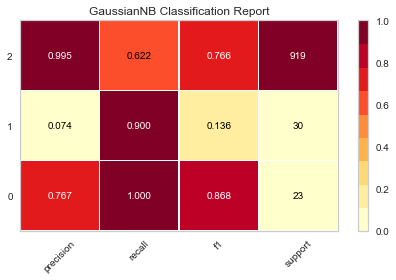

In [58]:
## C) GaussianNB Classifier and visualizer

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True)

visualizer.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_pc_te, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

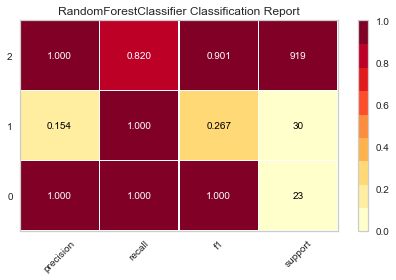

In [39]:
##https://github.com/georgetown-analytics/machine-learning/blob/master/notebook/Wheat%20Classification.ipynb

### D)Random Forest Classifier and visualizer

rf = RandomForestClassifier()
visualizer = ClassificationReport(rf, support=True)  

visualizer.fit(X,y)  # Fit the visualizer and the model
visualizer.score(X_testd,y_testd)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data


#rf.fit(X_pc_tr,y_train)
#expected  = y_test
#predicted = rf.predict(X_pc_te)       
#display(metrics.precision_score(expected, predicted, average='weighted'))
#display(metrics.recall_score(expected, predicted,average='weighted'))
#display(metrics.accuracy_score(expected, predicted))
#display(metrics.f1_score(expected, predicted, average='weighted'))



In [ ]:
#ClassPredictionError
#The Yellowbrick ClassPredictionError plot is a twist on other and sometimes more familiar classification model 
#diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, 
#this plot shows the support (number of training samples) for each class in the fitted classification 
#model as a stacked bar chart. Each bar is segmented to show the proportion of predictions 
#(including false negatives and false positives, like a Confusion Matrix) for each class. 
#You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult 
#time with, and more importantly, what incorrect answers it is giving on a per-class basis. 
#This can often enable you to better understand strengths and weaknesses of different models and particular 
#challenges unique to your dataset.
#The class prediction error chart provides a way to quickly understand how good 
#your classifier is at predicting the right classes.

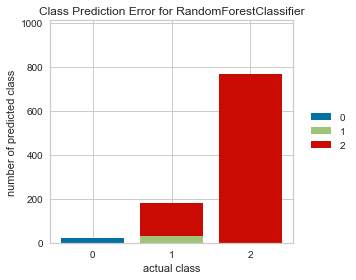

In [59]:
### D)Random Forest Classifier and visualizer 2


visualizer2 = ClassPredictionError(RandomForestClassifier(n_estimators=10))

# Fit the training data to the visualizer
visualizer2.fit(X_pc_tr, y_train)

# Evaluate the model on the test data
visualizer2.score(X_pc_te, y_test)

# Draw visualization
visualizer2.poof()

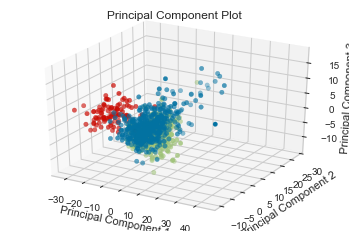

In [60]:
from yellowbrick.features.pca import PCADecomposition

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y_train]

visualizer = PCADecomposition(scale=True, color=label_color, proj_dim=3)
visualizer.fit(X_pc_tr, y_train)
visualizer.transform(X_pc_tr)
visualizer.poof()

In [ ]:
########### IGNORE AFTER THIS POINT ###############

In [ ]:
##RFE takes too Long with 2500 features###

#from sklearn import linear_model
#from sklearn.feature_selection import RFE

#lr = linear_model.LogisticRegression()
#rfe = RFE(lr)
#rfe.fit(X,y)
#rfe.ranking_[1]
#print(rfe.support_)
#print(rfe.ranking_)

KeyError: 0

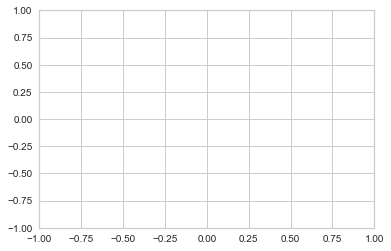

In [46]:
from yellowbrick.features import RadViz

# Instantiate the visualizer
#classes = ["0", "1","2"]
visualizer3 = RadViz()
visualizer3.fit(X_pc_tr, y_train)           # Fit the data to the visualizer
visualizer3.transform(X_pc_tr)        # Transform the data
visualizer3.poof()               # Draw/show/poof the data

In [29]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import StratifiedKFold
#from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
#cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
#model = MultinomialNB()
#visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
#visualizer.fit(X_pc_tr, y_train)
#visualizer.poof()

In [47]:
### F) Density Based Scan Clustering (DBSCAN)

from sklearn.cluster import DBSCAN

max_dist = 3# max distance between 2 samples to be a cluster
min_samp = 2# smallest size of a cluster
db_model = DBSCAN(eps=max_dist, min_samples=min_samp).fit(X_pc_tr)
labels = cluster_scan.labels_ # outliers will be labeled -1

core_samples = np.zero_like(labels,dtype = bool)
core_samples[dbscan.core_sample_indices_] = True




NameError: name 'cluster_scan' is not defined

In [128]:
from sklearn.discriminant_analysis
lda = LDA(n_components=2)
new_features = lda.fit(features, labels).transform(features)
print(new_features)

NameError: name 'LDA' is not defined

In [127]:
new_features[:10]

NameError: name 'new_features' is not defined

(array([317.,  14.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([4.08915129e-02, 9.76080768e+00, 1.94807238e+01, 2.92006400e+01,
        3.89205562e+01, 4.86404723e+01, 5.83603885e+01, 6.80803047e+01,
        7.78002209e+01, 8.75201370e+01, 9.72400532e+01]),
 <a list of 10 Patch objects>)

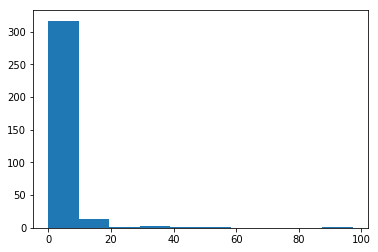

In [340]:
import matplotlib.pyplot as plt 
plt.hist(feat_imps[-338:]*1000)
#plt.boxplot(feat_imps[-775:]*100)